# Predicción del Clima
## Jahzeel Ulises Mendez Diaz

In [122]:
import numpy as np
import pandas as pd

## Dataframe

In [123]:
data = pd.read_csv("data/clima_copy.csv")
data

,YEAR,MO,DY,WS2M,RH2M,T2M_MAX,T2M_MIN,PRECTOTCORR
0,2015,1,1,0.87,65.88,19.51,5.12,0.00
1,2015,1,2,1.62,74.38,17.51,4.07,0.00
2,2015,1,3,1.22,69.75,15.12,4.48,0.00
3,2015,1,4,1.67,69.00,17.66,3.99,0.13
4,2015,1,5,1.86,79.25,15.67,2.11,0.12
...,...,...,...,...,...,...,...,...
1822,2019,12,28,1.38,66.94,20.09,6.00,0.00
1823,2019,12,29,1.05,62.69,18.51,7.58,0.02
1824,2019,12,30,1.38,60.62,20.55,5.02,0.03
1825,2019,12,31,1.16,57.25,21.08,5.01,0.00


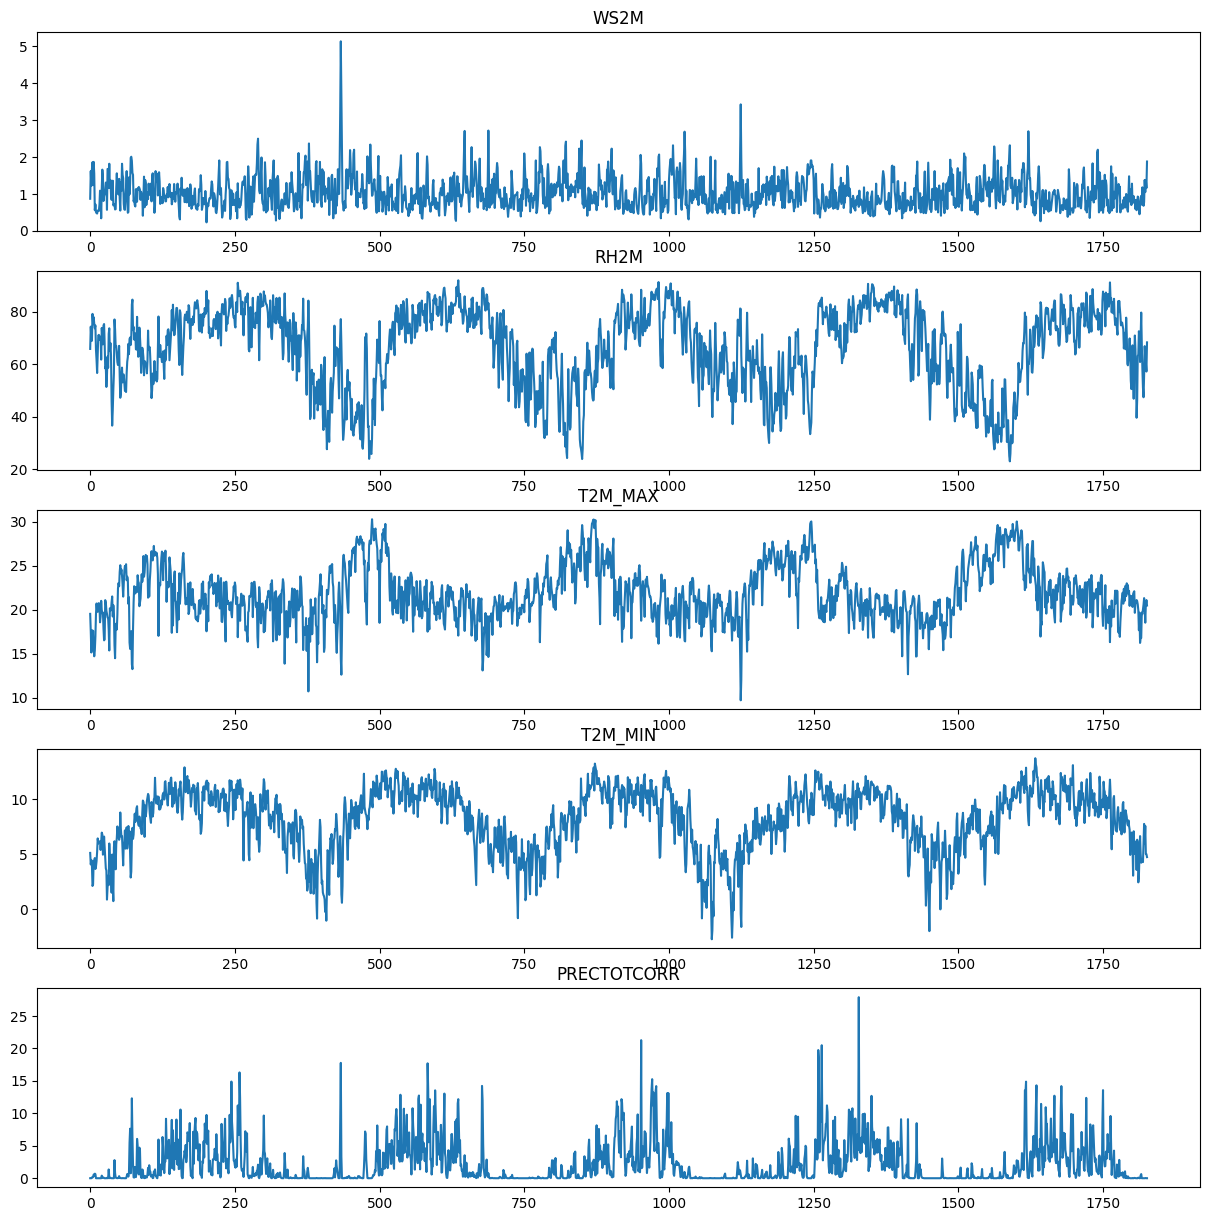

In [124]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(5,1,figsize=(15,15))
i = 0
for column in data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]].columns:
    ax[i].plot(data[column].squeeze())
    ax[i].set_title(column)
    i+=1

In [125]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_size = int(data.shape[0]*0.7)
val_size = int(data.shape[0]*0.15)

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

train_data = scaler.fit_transform(train_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
train_data = pd.DataFrame(train_data,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

val_data = scaler.transform(val_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
val_data = pd.DataFrame(val_data,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

test_data = scaler.transform(test_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]])
test_data = pd.DataFrame(test_data,columns=["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"])

X_train, y_train = create_sequences(train_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]],15)
X_val, y_val = create_sequences(val_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]], 15)
X_test, y_test = create_sequences(test_data[["WS2M","RH2M","T2M_MAX","T2M_MIN","PRECTOTCORR"]], 15)

In [127]:
from keras import Sequential
from keras import Input
import keras
model = Sequential()
model = Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=(5, 5)),
    keras.layers.LSTM(50),
    keras.layers.Dense(30),
    keras.layers.Dense(5)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

d:\Projects\ml-project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 5, 100)         │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 5)              │           155 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,285 (290.18 KB)

 Trainable params: 74,285 (290.18 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
print(X_train.shape)
print(y_train.shape)
model.compile(optimizer="adam", loss='mse')
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    batch_size=32
)

(1263, 15, 5)
(1263, 5)
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0735 - val_loss: 0.0139
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0116
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0133 - val_loss: 0.0113
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0110
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0105
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0110 - val_loss: 0.0091
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━

In [ ]:
print(model.evaluate(X_test,y_test))
print(model.predict(X_test))
print(y_test)

x = np.array([1,1,1,1,1])
print(scaler.inverse_transform(model.predict(X_test)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 
0.006925552152097225
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[ 1.79883301e-01  1.74022764e-01  8.75309408e-01  7.14260459e-01
   7.66417012e-04]
 [ 1.95125103e-01  1.59966916e-01  9.03746665e-01  7.63974071e-01
   8.23542289e-03]
 [ 2.37921625e-01  1.08181454e-01  8.96463454e-01  7.01799989e-01
  -2.95666791e-03]
 ...
 [ 1.72935784e-01  5.50833166e-01  4.99652952e-01  5.00368834e-01
   2.70759873e-03]
 [ 1.83572948e-01  4.94230449e-01  5.00669420e-01  4.46258038e-01
  -7.87470862e-03]
 [ 1.71386987e-01  4.69803691e-01  5.26139379e-01  4.59653556e-01
  -2.65946612e-04]]
[[0.18126273 0.10897624 0.93193972 0.81363352 0.        ]
 [0.34215886 0.09152244 0.96840058 0.70794246 0.00329102]
 [0.26272912 0.26019361 0.76956733 0.48530331 0.00329102]
 ...
 [0.23421589 0.5388677  0.52795333 0.48530331 0.00141044]
 [0.18940937 0.48943972 0.55371901 0.48467792 0.        ]
 [0.33604888 0.65268407 0.52357803 0.46779237 0.        ]]


ValueError: operands could not be broadcast together with shapes (1,5) (8,) (1,5) 